In [1]:
import codigo
from codigo import utils
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pickle import dump

%matplotlib inline

# Importar Dataset depurado

In [3]:
df_Inicial = pd.read_csv(r'dataset/generado/datasetDepurado.csv')

# Revisamos las columnas que contiene el Dataset

In [4]:
df_Inicial.head()

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0


In [5]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             object 
 1   Date           object 
 2   Glucose level  float64
dtypes: float64(1), object(2)
memory usage: 67.9+ MB


### Cambiamos el formato de la columna Date de object a datetime64

In [24]:
df_Inicial['Date']=pd.to_datetime(df_Inicial['Date'])

In [7]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.9+ MB


In [8]:
df_Inicial['Date'].min()

Timestamp('2018-01-06 00:31:00')

In [9]:
df_Inicial['Date'].max()

Timestamp('2022-03-20 23:58:00')

# Iniciamos Análisis Exploratorio

## Sobre el conjunto de datos depurado

In [46]:
from pandas_profiling import ProfileReport
profile = ProfileReport(
    df_Inicial,
    missing_diagrams={
          'heatmap': True,
          'dendrogram': False,
      },
    correlations={
         "kendall": {"calculate": False},
         "phi_k": {"calculate": False},
         "cramers": {"calculate": False},
         "pearson": {"calculate": True,"threshold":0.8,"warn_high_correlations":True}
        
     }
)

In [47]:
profile.to_file("analisisExploratorio/datasetDepurado.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Sobre el conjunto de un paciente

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))

In [11]:
pacienteID="LIB193277"
paciente_data = utils.getDataPatient(df_Inicial,pacienteID,'15min',False)
paciente_data=utils.fillNullData(paciente_data,'interpolate_linear')
paciente_data=utils.generateNewColumns(paciente_data,scalerLevelId,scalerHours,scalerMin,scalerPodId,scalerGlucosa,False)

In [19]:
paciente_data

,Glucose level,level_label,level_id,hour,min,pod_label,pod_id
Date,,,,,,,
2018-06-12 20:15:00,156.0,euglycemia,0,20,15,Eve,4
2018-06-12 20:30:00,163.0,euglycemia,0,20,30,Eve,4
2018-06-12 20:45:00,158.0,euglycemia,0,20,45,Eve,4
2018-06-12 21:00:00,167.0,euglycemia,0,21,0,Night,5
2018-06-12 21:15:00,139.0,euglycemia,0,21,15,Night,5
...,...,...,...,...,...,...,...
2022-03-18 10:45:00,153.0,euglycemia,0,10,45,Morning,2
2022-03-18 11:00:00,144.0,euglycemia,0,11,0,Morning,2
2022-03-18 11:15:00,134.0,euglycemia,0,11,15,Morning,2


In [48]:
from pandas_profiling import ProfileReport
profile = ProfileReport(paciente_data, tsmode=True, sortby="Date"
    ,missing_diagrams={
          'heatmap': True,
          'dendrogram': False,
      },
    correlations={
         "kendall": {"calculate": False},
         "phi_k": {"calculate": False},
         "cramers": {"calculate": False},
         "pearson": {"calculate": True,"threshold":0.8,"warn_high_correlations":True}
        
     })

In [49]:
profile.to_file("analisisExploratorio/paciente_LIB193277.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##  Análisis de correlación

In [34]:
features=['Glucose level','hour','min','pod_id','level_id']

In [36]:
paciente_df=paciente_data[features].copy()
correlation_matrix = paciente_df.corr()            
correlation_matrix

,Glucose level,hour,min,pod_id,level_id
Glucose level,1.000000,0.052338,-0.000714,0.058993,0.676404
hour,0.052338,1.000000,0.000012,0.010564,0.051589
min,-0.000714,0.000012,1.000000,0.000003,0.000906
pod_id,0.058993,0.010564,0.000003,1.000000,0.043371
level_id,0.676404,0.051589,0.000906,0.043371,1.000000


In [53]:
correlated_features = set()
correlated_features = correlation_matrix.index[abs(correlation_matrix["Glucose level"])>0.5]
correlated_features

Index(['Glucose level', 'level_id'], dtype='object')

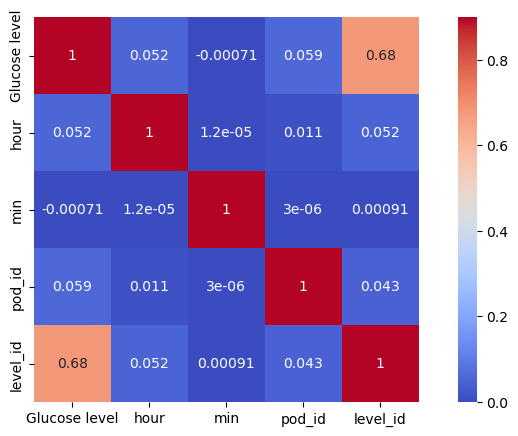

In [52]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix,  vmax=.9, square=True, annot=True,cmap='coolwarm')
plt.show()

##  Análisis de balanceo de clases

### Clase: Hora del día

<AxesSubplot:>

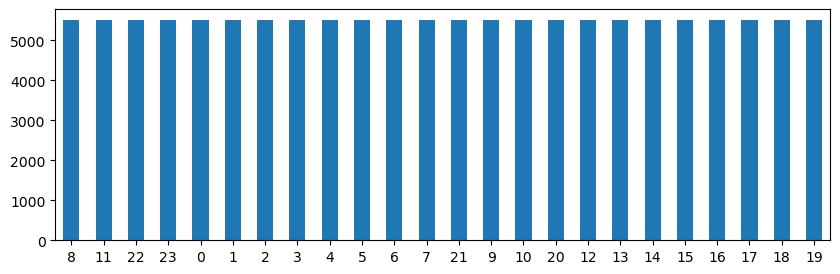

In [41]:
paciente_data['hour'].value_counts().plot.bar( rot=0,figsize=(10, 3))

### Clase: Parte del día

<AxesSubplot:>

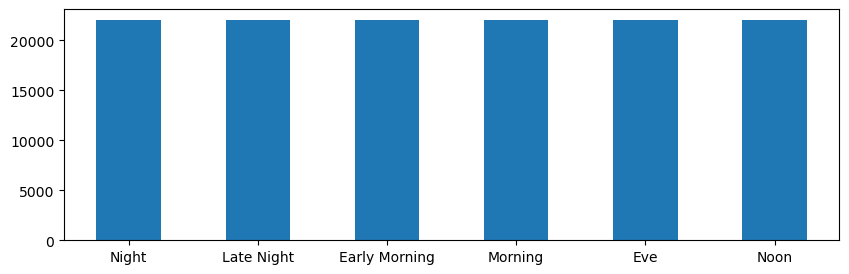

In [42]:
paciente_data['pod_label'].value_counts().plot.bar( rot=0,figsize=(10, 3))

### Clase: Niveles de Glucosa

In [45]:
paciente_data['level_label'].value_counts()

euglycemia       116688
hyperglycemia      8408
hypoglycemia       6871
Name: level_label, dtype: int64

<AxesSubplot:>

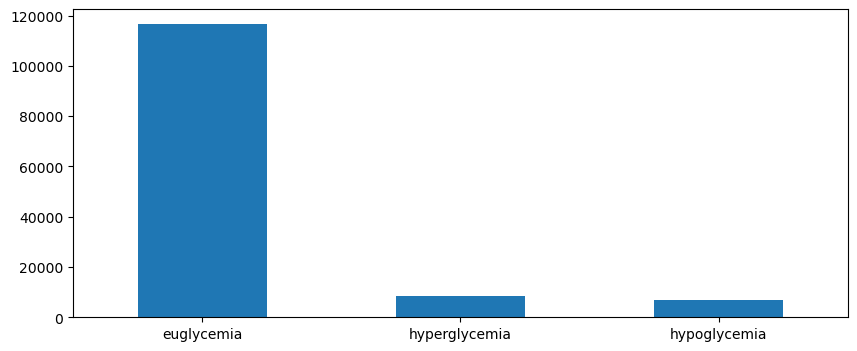

In [43]:
paciente_data['level_label'].value_counts().plot.bar( rot=0,figsize=(10, 4))

<AxesSubplot:ylabel='level_label'>

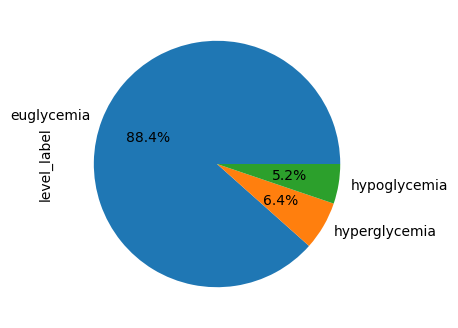

In [44]:
paciente_data['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))